# Hello Homes Expansion Project: Builders Edition 

**Authors:** Monique Hercules 
***

## Overview


Our stakeholder is a local real estate agency that help homeowners buy/sell homes. After years in the industry they have decided to expand to include the building and flipping of homes as well to better meet there consumer needs and increase revenue .

The dataset in use will be from King County of Washington State. It will feature various aspects of a home like sqft living, year built and the condition of the home. 

## Business Problem

Hello Homes would like to find out what types of homes they would need to build based off of there past sales to meet there consumers needs and increase revenue. They are targeting the most popular price ranges, sqft living, and accommodation preferences like bathrooms,bedrooms and number of floors. 

Today we will provide evidential advice on various aspects of a home to fit the builders needs. By targeting this information the real estate agency will know exactly what types of homes to build for their clients.With the use of multiple linear regression we will be able to accurately  see the relationship between the various attributes of a home and and how they reflect upon the homes worth. 



## Data Understanding 

Import revelant libraries, and inspect data 

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [21]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Verifying Assumptions for Linear Regression

### Checking for Linearity relation and removing outliers

Price vs Bedrooms

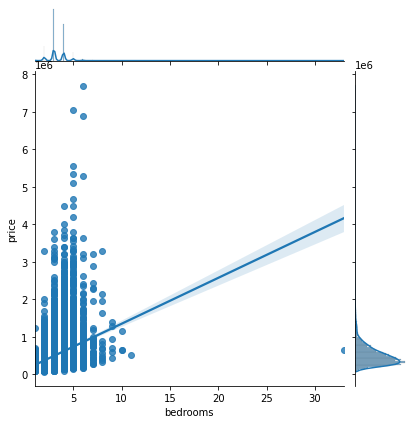

In [23]:
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')
#categorical but will be treating as continous
#Without Removed outliers

Price vs Square foot above

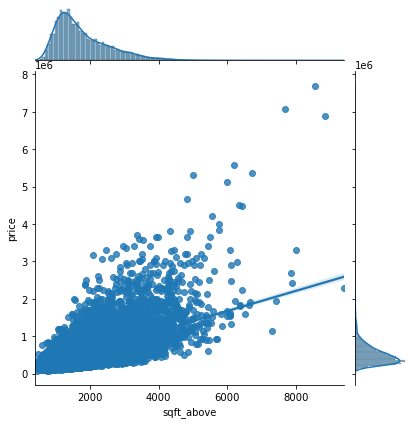

In [24]:
sns.jointplot(x='sqft_above', y='price', data=df, kind='reg')

We can see from the graph above that we have some outliers when square foot above is above 3500. To increase accuracy of our future model we will remove these outliers.

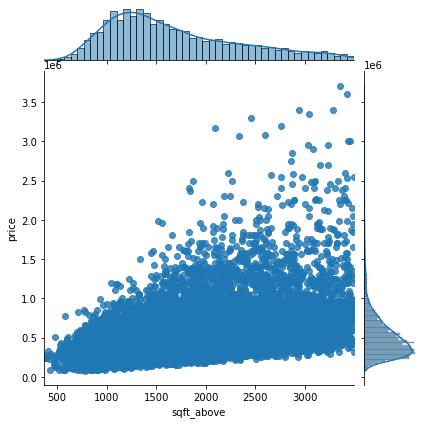

In [25]:
df = df.loc[df['sqft_above'] < 3500]
sns.jointplot(x='sqft_above', y='price', data=df, kind='reg')

Price vs Square foot living 

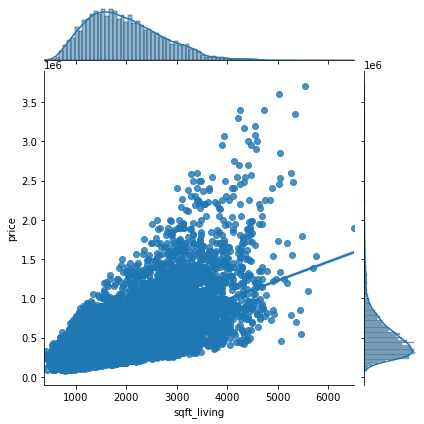

In [26]:
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')
#Linear Relation
#Without removed outlier

Removing outliers above 4500 

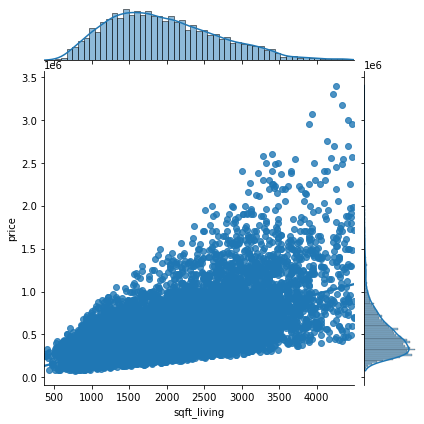

In [27]:
df = df.loc[df['sqft_living'] < 4500]
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')
#With removed outliers

Price vs Square foot lot 

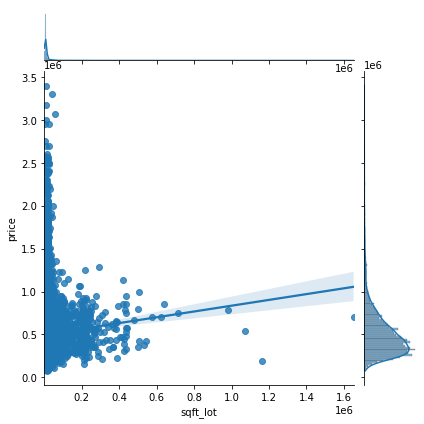

In [28]:
sns.jointplot(x='sqft_lot', y='price', data=df, kind='reg')
#no linear relation, will not be used

Price vs Floors 

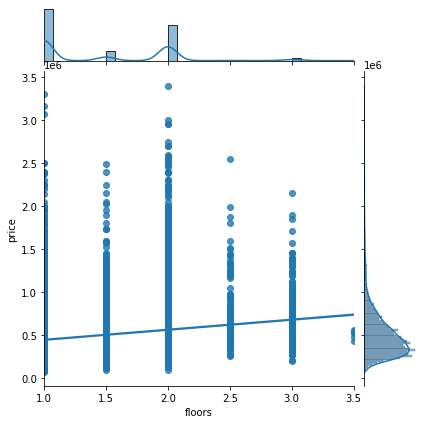

In [29]:
sns.jointplot(x='floors', y='price', data=df, kind='reg')
#categorical but will be treating as continous
#without removed outliers 

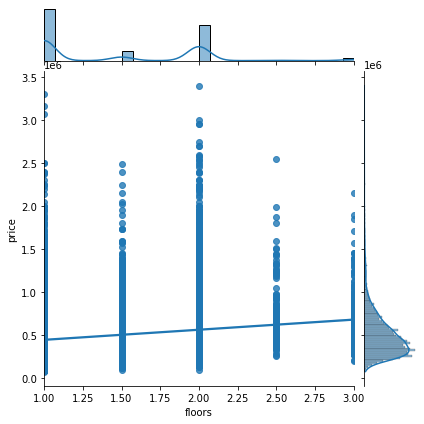

In [30]:
df = df.loc[df['floors'] <= 3]
sns.jointplot(x='floors', y='price', data=df, kind='reg')
#Removed outliers above 3

Price vs Bathrooms 

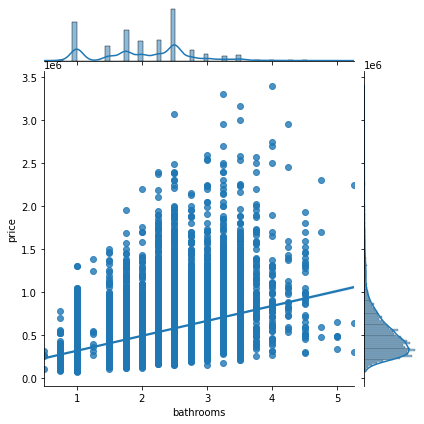

In [31]:
sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')
#categorical but will be treating as continous
#Without Removed outlier

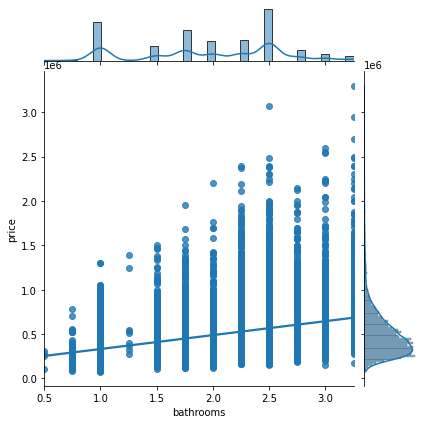

In [32]:
df = df.loc[df['bathrooms'] < 3.5]
sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')
#Removed outliers above 3.5

Price vs Bedrooms 

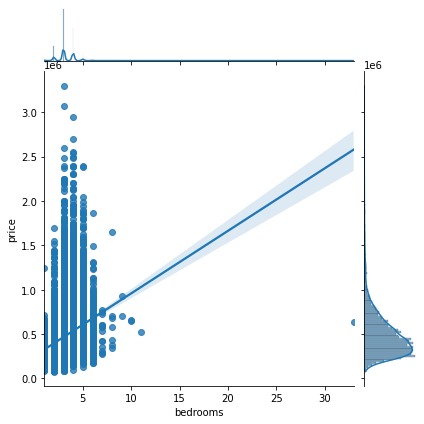

In [33]:
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')
#linear relation , categorical but will be treating as continous
#Without Removed outlier

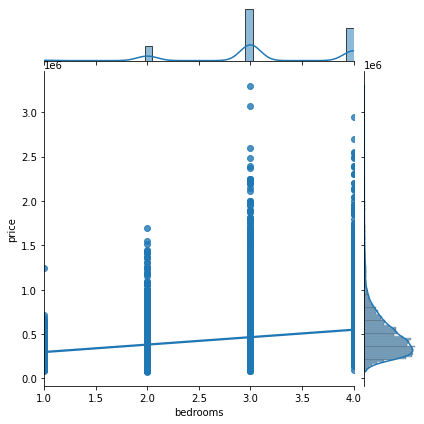

In [34]:
df = df.loc[df['bedrooms'] < 4.5]
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')
#Removed Outliers above 4.5

Price vs Year Built 

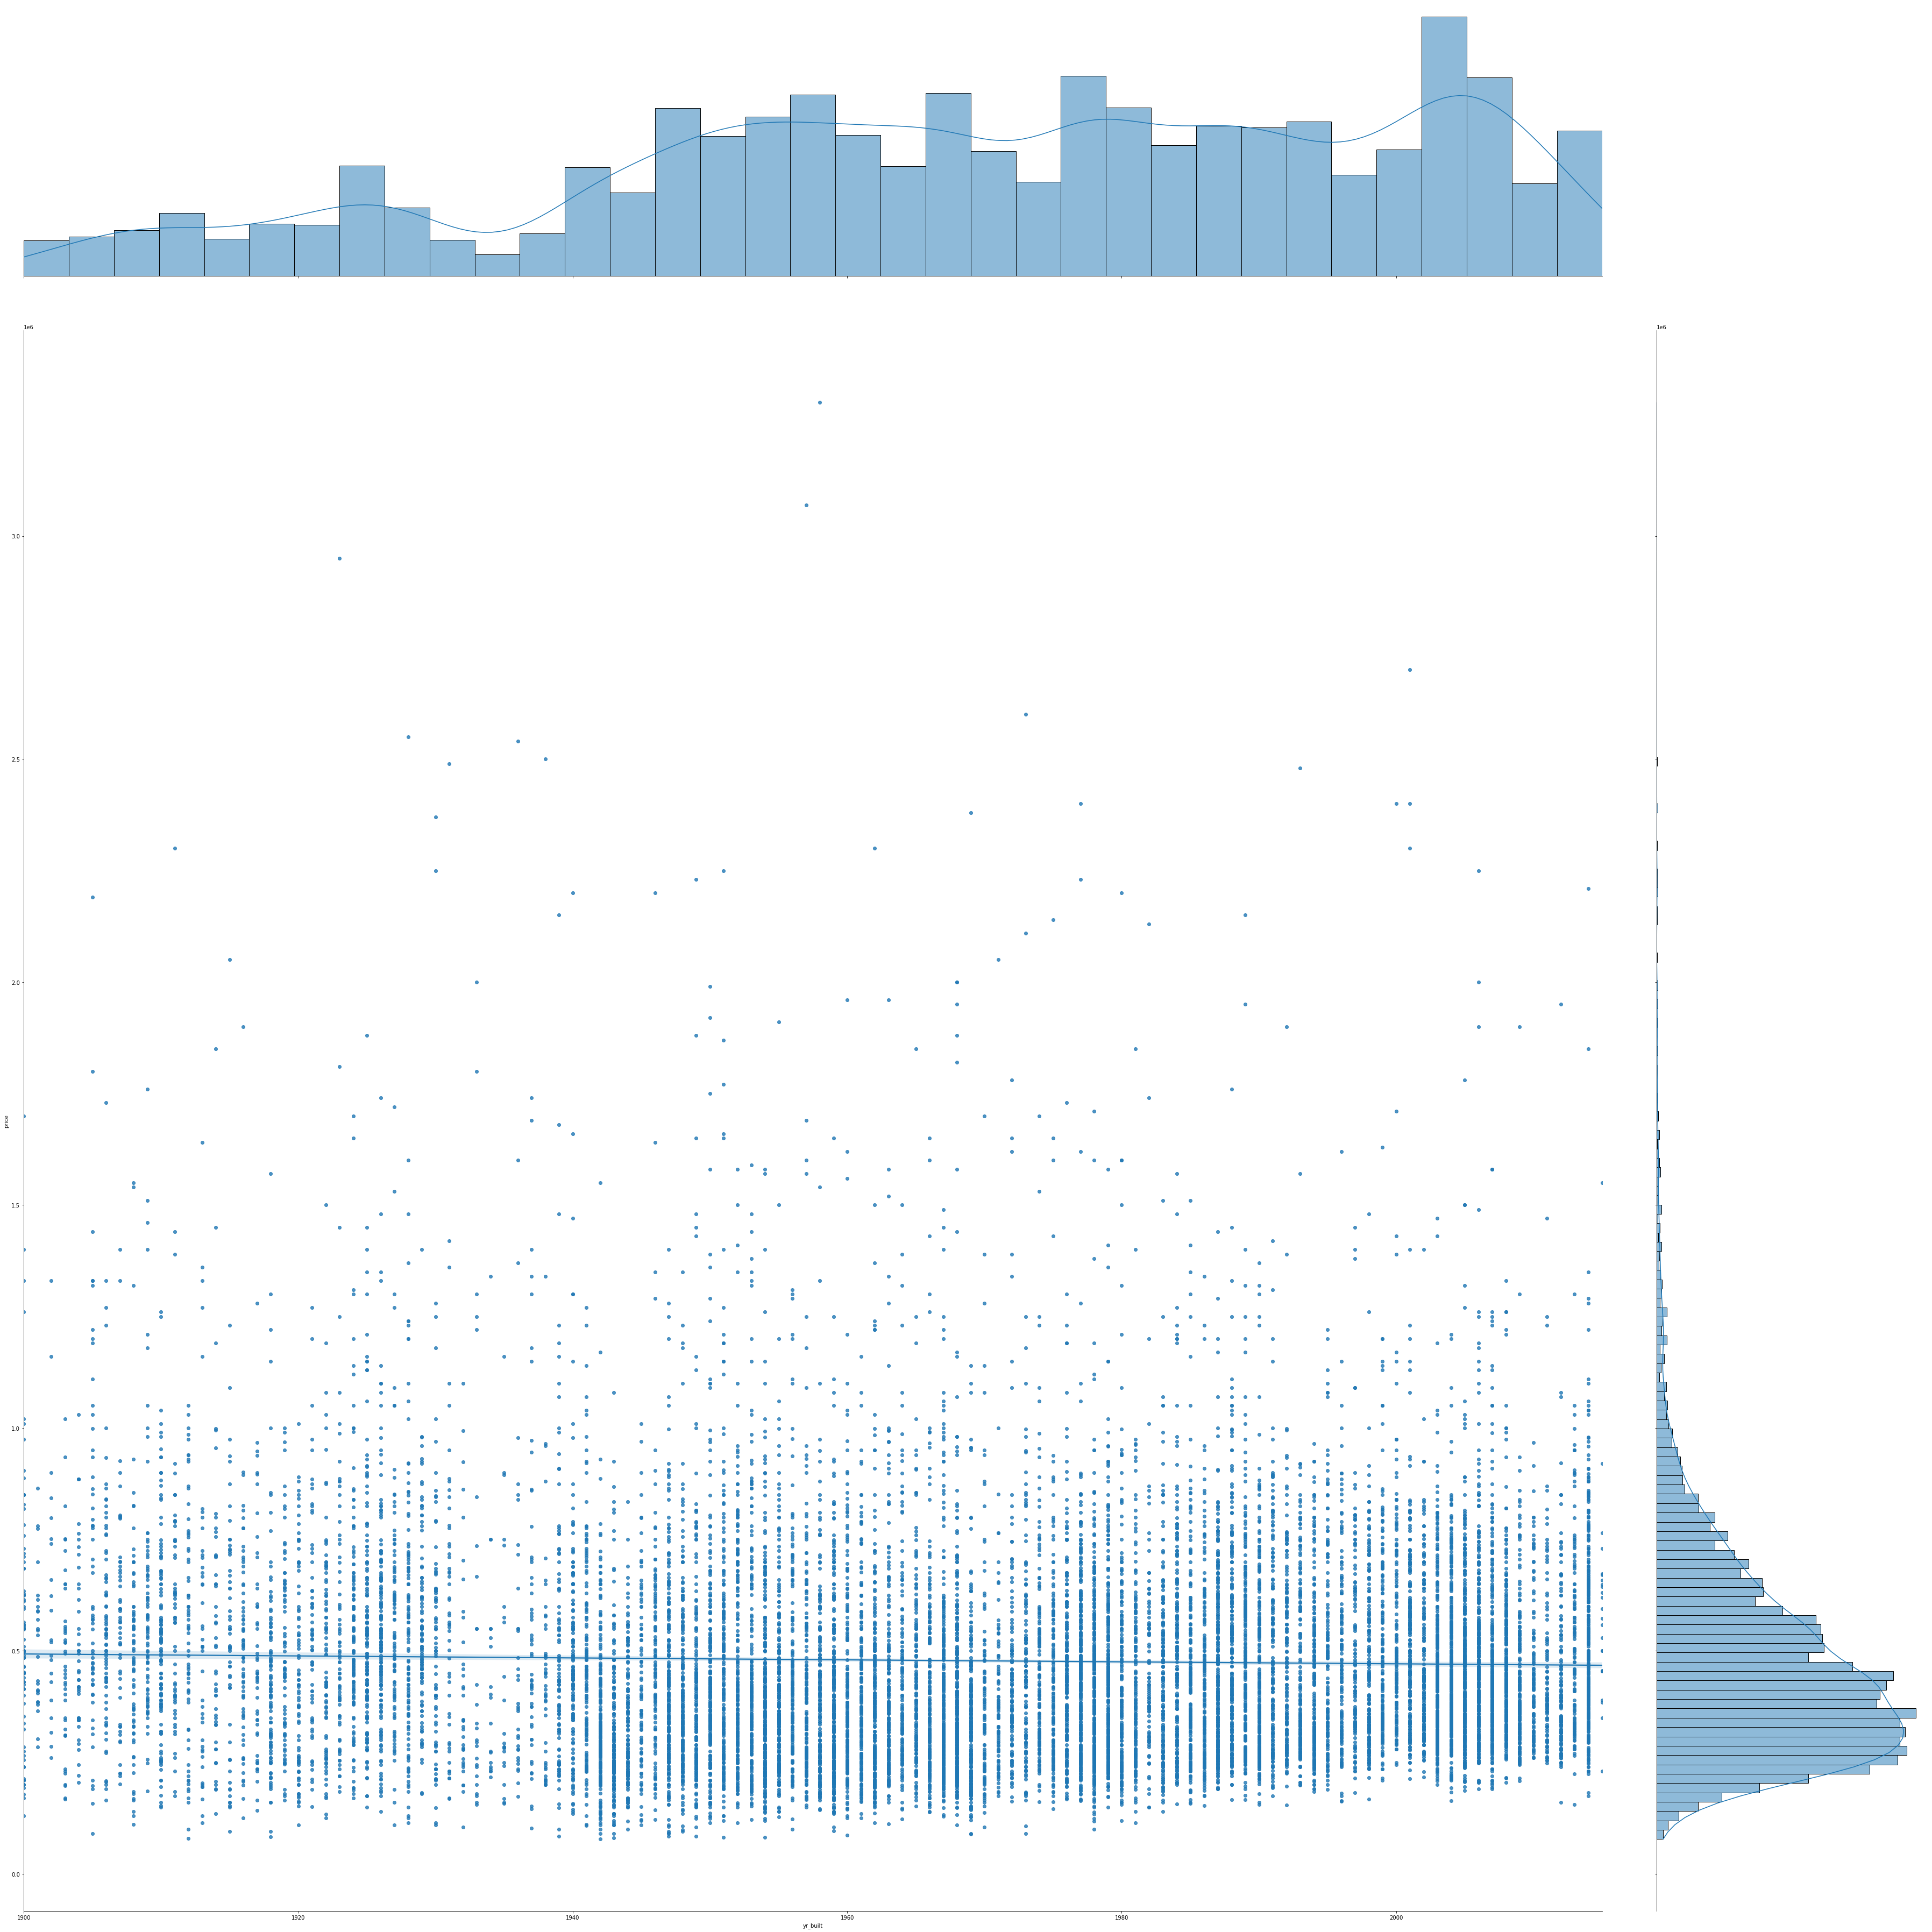

In [35]:
sns.jointplot(x='yr_built', y='price', data=df, kind='reg', height=50)
#No Linear relation, will not be used

Price vs Zipcode

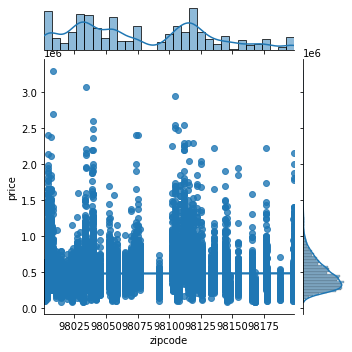

In [36]:
sns.jointplot(x='zipcode', y='price', data=df, kind='reg', height=5)
#Will not use this variable
#Categorical

### Normality

#### Checking for normality 

Using histogram to check distribution of all relevant numerical columns 

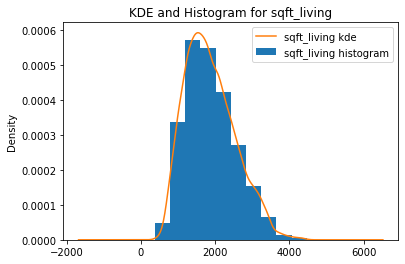

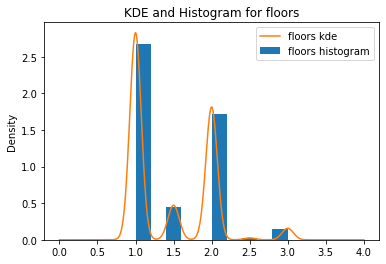

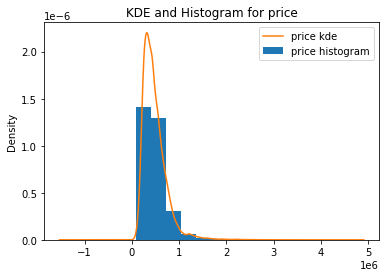

In [37]:
def plotNormality(df, column):
    df[column].plot.hist(title='KDE and Histogram for ' + column,
                         density=True,
                         label=column + ' histogram')
    df[column].plot.kde(label=column + ' kde')
    plt.legend()
    plt.show()


numerical_features = ['sqft_living', 'floors', 'price']
for column in numerical_features:
    plotNormality(df, column)

Based on the distribution of price above we decided to remove any price above $1 million.

In [38]:
df = df.loc[df['price'] < 1_000_000]

We can see below that this gave price a more even distribution.

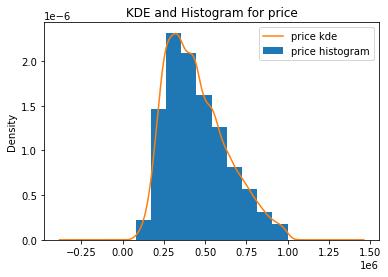

In [39]:
plotNormality(df, 'price')

### Dropping irrelevant columns

In [40]:
df = df.drop(columns=[
    'id', 'lat', 'long', 'sqft_above', 'waterfront', 'date', 'view',
    'sqft_basement', 'yr_built', 'sqft_lot', 'yr_renovated', 'zipcode',
    'sqft_living15', 'sqft_lot15'
])
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade
0,221900.0,3,1.00,1180,1.0,Average,7 Average
1,538000.0,3,2.25,2570,2.0,Average,7 Average
2,180000.0,2,1.00,770,1.0,Average,6 Low Average
3,604000.0,4,3.00,1960,1.0,Very Good,7 Average
4,510000.0,3,2.00,1680,1.0,Average,8 Good


### Checking for missing values 

In [41]:
df.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
condition      0
grade          0
dtype: int64

Checking how many results left after cleaning 

In [42]:
df.shape

(17866, 7)

### Checking for multicollinearity 

Does Multicollinearity exists between the house features?

<AxesSubplot:>

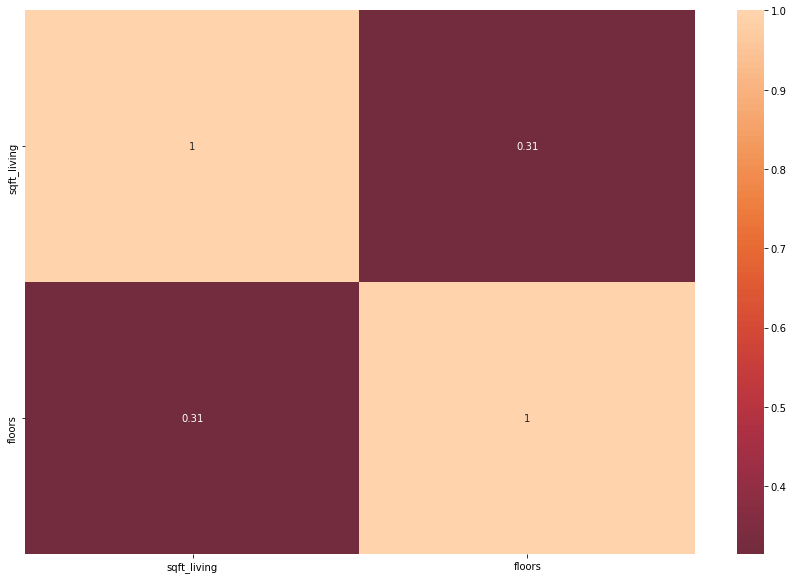

In [43]:
feats = ['sqft_living', 'floors']
corr = df[feats].corr()

_, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, center=0, annot=True, ax=ax)

Keeping all features that are below .75 on the multicollinearity scale 

In [44]:
#Saved cleaned data
df.to_csv("data/kc_house_data_cleaned.csv", index=False)

## Preprocessing 

 ### One Hot Encoding

In [45]:
cnd_dummy = pd.get_dummies(df['condition'], prefix='cnd', drop_first=True)
grp_dummy = pd.get_dummies(df['grade'], prefix='grd', drop_first=True)

fl_dummy = pd.get_dummies(df['floors'], prefix='fl', drop_first=True)

bed_dummy = pd.get_dummies(df['bedrooms'], prefix='bed', drop_first=True)

bath_dummy = pd.get_dummies(df['bathrooms'], prefix='bath', drop_first=True)

In [46]:
df = df.drop(['condition', 'grade', 'floors', 'bedrooms', 'bathrooms'], axis=1)

In [47]:
df_final = pd.concat(
    [df, cnd_dummy, grp_dummy, fl_dummy, bed_dummy, bath_dummy], axis=1)
df_final.head()

,price,sqft_living,cnd_Fair,cnd_Good,cnd_Poor,cnd_Very Good,grd_11 Excellent,grd_3 Poor,grd_4 Low,grd_5 Fair,...,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25
0,221900.0,1180,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,538000.0,2570,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,180000.0,770,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,604000.0,1960,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,510000.0,1680,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Formatting column names for syntax purposes  

In [48]:
df_final.columns = df_final.columns.str.replace('.', '_')
df_final.columns = df_final.columns.str.replace(' ', '_')
df_final.columns = df_final.columns.str.replace('-', '_')

## Modeling 

### Fitting the Initial Model 

In [49]:
outcome = 'price'
predictor_cols = df_final.columns.tolist()
predictor_cols.remove('price')

In [50]:
df_final.describe()

,price,sqft_living,cnd_Fair,cnd_Good,cnd_Poor,cnd_Very_Good,grd_11_Excellent,grd_3_Poor,grd_4_Low,grd_5_Fair,...,bath_1_0,bath_1_25,bath_1_5,bath_1_75,bath_2_0,bath_2_25,bath_2_5,bath_2_75,bath_3_0,bath_3_25
count,17866.000000,17866.000000,17866.000000,17866.000000,17866.000000,17866.000000,17866.000000,17866.000000,17866.000000,17866.000000,...,17866.000000,17866.000000,17866.000000,17866.000000,17866.000000,17866.000000,17866.000000,17866.000000,17866.000000,17866.000000
mean,447930.215437,1829.052558,0.009123,0.271297,0.001511,0.076178,0.001847,0.000056,0.001511,0.013098,...,0.212247,0.000392,0.076794,0.159857,0.098679,0.101422,0.263349,0.045114,0.023508,0.014441
std,184671.974428,644.597787,0.095083,0.444642,0.038847,0.265290,0.042939,0.007481,0.038847,0.113696,...,0.408910,0.019791,0.266272,0.366483,0.298239,0.301895,0.440463,0.207559,0.151516,0.119303
min,78000.000000,370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,303549.250000,1340.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,418000.000000,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,563900.000000,2250.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,999999.000000,4410.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Importing statsmodel OLS for modeling 

In [51]:
from statsmodels.formula.api import ols

In [52]:
predictors = '+'.join(predictor_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     465.3
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:02:11   Log-Likelihood:            -2.3670e+05
No. Observations:               17866   AIC:                         4.735e+05
Df Residuals:                   17834   BIC:                         4.737e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.259e+05   6.99e+04      6.093      0.000    2.89e+05    5.63e+05
sqft_living         109.4806      2.791     39.229      0.000     104.010     114.951
cnd_Fair          -2.887e+04    1.1e+04     -2.635      0.008   -5.03e+04   -7393.610
cnd_Good           2.939e+04   2501.823     11.747      0.000    2.45e+04    3.43e+04
cnd_Poor           2389.0309   2.67e+04      0.089      0.929      -5e+04    5.47e+04
cnd_Very_Good      7.951e+04   4094.016     19.421      0.000    7.15e+04    8.75e+04
grd_11_Excellent   4.078e+04   2.49e+04      1.636      0.102   -8067.529    8.96e+04
grd_3_Poor        -4.046e+05   1.39e+05     -2.910      0.004   -6.77e+05   -1.32e+05
grd_4_Low         -3.946e+05   2.92e+04    -13.494      0.000   -4.52e+05   -3.37e+05
grd_5_Fair        -3.842e+05   1.25e+04    -30.721      0.000   -4.09e+05    -3.6e+05
grd_6_Low_Average -3.419e+05   8788.676    -38.908      0.000   -3.59e+05   -3.25e+05
grd_7_Average     -2.626e+05   7859.722    -33.416      0.000   -2.78e+05   -2.47e+05
grd_8_Good        -1.752e+05   7532.941    -23.262      0.000    -1.9e+05    -1.6e+05
grd_9_Better       -7.79e+04   7725.072    -10.084      0.000    -9.3e+04   -6.28e+04
fl_1_5             8.062e+04   3806.075     21.182      0.000    7.32e+04    8.81e+04
fl_2_0            -1.407e+04   3084.828     -4.562      0.000   -2.01e+04   -8024.937
fl_2_5             7.206e+04   1.61e+04      4.481      0.000    4.05e+04    1.04e+05
fl_3_0             4.476e+04   6728.398      6.653      0.000    3.16e+04     5.8e+04
bed_2             -1669.9522   1.06e+04     -0.158      0.875   -2.24e+04    1.91e+04
bed_3               -5.6e+04   1.06e+04     -5.281      0.000   -7.68e+04   -3.52e+04
bed_4             -6.374e+04   1.09e+04     -5.858      0.000   -8.51e+04   -4.24e+04
bath_0_75          1.042e+05   7.09e+04      1.471      0.141   -3.47e+04    2.43e+05
bath_1_0           8.917e+04   6.88e+04      1.296      0.195   -4.57e+04    2.24e+05
bath_1_25           5.64e+04   8.62e+04      0.654      0.513   -1.13e+05    2.25e+05
bath_1_5           7.754e+04   6.89e+04      1.125      0.261   -5.76e+04    2.13e+05
bath_1_75           8.89e+04   6.89e+04      1.291      0.197   -4.61e+04    2.24e+05
bath_2_0           8.595e+04   6.89e+04      1.247      0.212   -4.91e+04    2.21e+05
bath_2_25          7.449e+04   6.89e+04      1.081      0.280   -6.06e+04     2.1e+05
bath_2_5           5.538e+04   6.89e+04      0.804      0.422   -7.97e+04     1.9e+05
bath_2_75          8.515e+04    6.9e+04      1.233      0.217   -5.02e+04     2.2e+05
bath_3_0           7.821e+04   6.92e+04      1.130      0.258   -5.74e+04    2.14e+05
bath_3_25          9.579e+04   6.94e+04      1.380      0.168   -4.03e+04    2.32e+05
=========================================================================

### Initial Refinement 

From the model above we can see that we have some predictor columns with P values greater than 0.05. Below we will write a function to remove these from our predictor columns.

In [53]:
# Removing P values greater than 0.05
def removingHighPValues(columns):
    for col in df_final.columns.tolist():
        if col in columns and col in predictor_cols and model.pvalues[
                col] >= 0.05:
            columns.remove(col)


removingHighPValues(predictor_cols)
predictor_cols

['sqft_living',
 'cnd_Fair',
 'cnd_Good',
 'cnd_Very_Good',
 'grd_3_Poor',
 'grd_4_Low',
 'grd_5_Fair',
 'grd_6_Low_Average',
 'grd_7_Average',
 'grd_8_Good',
 'grd_9_Better',
 'fl_1_5',
 'fl_2_0',
 'fl_2_5',
 'fl_3_0',
 'bed_3',
 'bed_4']

Now let us refit our model with new predictor columns

In [54]:
#Model fit with removed p values greater than 0.05
outcome = 'price'
predictors = '+'.join(predictor_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     837.5
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:02:13   Log-Likelihood:            -2.3676e+05
No. Observations:               17866   AIC:                         4.736e+05
Df Residuals:                   17848   BIC:                         4.737e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.187e+05   9713.347     53.400      0.000       5e+05    5.38e+05
sqft_living         105.5370      2.574     41.000      0.000     100.491     110.582
cnd_Fair          -2.709e+04    1.1e+04     -2.468      0.014   -4.86e+04   -5572.933
cnd_Good           3.095e+04   2490.246     12.430      0.000    2.61e+04    3.58e+04
cnd_Very_Good      8.118e+04   4082.107     19.886      0.000    7.32e+04    8.92e+04
grd_3_Poor        -3.928e+05   1.38e+05     -2.843      0.004   -6.64e+05   -1.22e+05
grd_4_Low         -3.899e+05    2.8e+04    -13.951      0.000   -4.45e+05   -3.35e+05
grd_5_Fair        -3.855e+05   1.23e+04    -31.432      0.000    -4.1e+05   -3.61e+05
grd_6_Low_Average -3.429e+05   8589.670    -39.924      0.000    -3.6e+05   -3.26e+05
grd_7_Average     -2.655e+05   7631.836    -34.790      0.000    -2.8e+05   -2.51e+05
grd_8_Good        -1.805e+05   7269.762    -24.831      0.000   -1.95e+05   -1.66e+05
grd_9_Better      -8.285e+04   7498.038    -11.049      0.000   -9.75e+04   -6.82e+04
fl_1_5              8.18e+04   3786.740     21.603      0.000    7.44e+04    8.92e+04
fl_2_0            -2.707e+04   2708.371     -9.994      0.000   -3.24e+04   -2.18e+04
fl_2_5               6.6e+04   1.61e+04      4.108      0.000    3.45e+04    9.75e+04
fl_3_0             3.475e+04   6498.362      5.347      0.000     2.2e+04    4.75e+04
bed_3              -5.69e+04   3205.826    -17.749      0.000   -6.32e+04   -5.06e+04
bed_4              -6.55e+04   3909.786    -16.752      0.000   -7.32e+04   -5.78e+04
==============================================================================
Omnibus:                      837.588   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              998.322
Skew:                           0.516   Prob(JB):                    1.65e-217
Kurtosis:                       3.526   Cond. No.                     2.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking for Multicollinearity in Initial model 

The initial model indicates that their is still a strong multicollinearity issue even though we checked for multicollinearity before modeling. Hopefully with further refinements the model will showcase less multicollinearity and more improvement. After the refinement removal of high p values over 0.05 the R-squared dropped from 0.447 to 0.444.Now checking to see if it meets further assumptions.

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
#Created a function for checking and removing variance less than 10
def removeHighVariancePreditors(df, predictor_cols):
    # Create tempory data frame that contains predictor columns
    temp_df = df[predictor_cols]

    # Calculating variance inflation factor for each predictor column
    vif = []
    cols_with_high_var = []
    for col_idx in range(temp_df.shape[1]):
        vif.append(variance_inflation_factor(temp_df.values, col_idx))

    # Removing columns that contain high variance inflation factors
    new_predictor_cols = []
    for col, val in list(zip(predictor_cols, vif)):
        if val < 15:
            new_predictor_cols.append(col)
        else:
            cols_with_high_var.append(col)
    # Returns all predictors columns with variance inflation factors less than
    # 15
    return new_predictor_cols

In [57]:
# Removing columns with high variance
predictor_cols = removeHighVariancePreditors(df_final,
                                             predictor_cols)
predictor_cols

['sqft_living',
 'cnd_Fair',
 'cnd_Good',
 'cnd_Very_Good',
 'grd_3_Poor',
 'grd_4_Low',
 'grd_5_Fair',
 'grd_6_Low_Average',
 'grd_7_Average',
 'grd_8_Good',
 'grd_9_Better',
 'fl_1_5',
 'fl_2_0',
 'fl_2_5',
 'fl_3_0',
 'bed_3',
 'bed_4']

In [58]:
outcome = 'price'
predictors = '+'.join(predictor_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     837.5
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:02:15   Log-Likelihood:            -2.3676e+05
No. Observations:               17866   AIC:                         4.736e+05
Df Residuals:                   17848   BIC:                         4.737e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.187e+05   9713.347     53.400      0.000       5e+05    5.38e+05
sqft_living         105.5370      2.574     41.000      0.000     100.491     110.582
cnd_Fair          -2.709e+04    1.1e+04     -2.468      0.014   -4.86e+04   -5572.933
cnd_Good           3.095e+04   2490.246     12.430      0.000    2.61e+04    3.58e+04
cnd_Very_Good      8.118e+04   4082.107     19.886      0.000    7.32e+04    8.92e+04
grd_3_Poor        -3.928e+05   1.38e+05     -2.843      0.004   -6.64e+05   -1.22e+05
grd_4_Low         -3.899e+05    2.8e+04    -13.951      0.000   -4.45e+05   -3.35e+05
grd_5_Fair        -3.855e+05   1.23e+04    -31.432      0.000    -4.1e+05   -3.61e+05
grd_6_Low_Average -3.429e+05   8589.670    -39.924      0.000    -3.6e+05   -3.26e+05
grd_7_Average     -2.655e+05   7631.836    -34.790      0.000    -2.8e+05   -2.51e+05
grd_8_Good        -1.805e+05   7269.762    -24.831      0.000   -1.95e+05   -1.66e+05
grd_9_Better      -8.285e+04   7498.038    -11.049      0.000   -9.75e+04   -6.82e+04
fl_1_5              8.18e+04   3786.740     21.603      0.000    7.44e+04    8.92e+04
fl_2_0            -2.707e+04   2708.371     -9.994      0.000   -3.24e+04   -2.18e+04
fl_2_5               6.6e+04   1.61e+04      4.108      0.000    3.45e+04    9.75e+04
fl_3_0             3.475e+04   6498.362      5.347      0.000     2.2e+04    4.75e+04
bed_3              -5.69e+04   3205.826    -17.749      0.000   -6.32e+04   -5.06e+04
bed_4              -6.55e+04   3909.786    -16.752      0.000   -7.32e+04   -5.78e+04
==============================================================================
Omnibus:                      837.588   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              998.322
Skew:                           0.516   Prob(JB):                    1.65e-217
Kurtosis:                       3.526   Cond. No.                     2.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
new_predictor_cols = removeHighVariancePreditors(df_final, predictor_cols)
print("New predictor cols", new_predictor_cols)

New predictor cols ['sqft_living', 'cnd_Fair', 'cnd_Good', 'cnd_Very_Good', 'grd_3_Poor', 'grd_4_Low', 'grd_5_Fair', 'grd_6_Low_Average', 'grd_7_Average', 'grd_8_Good', 'grd_9_Better', 'fl_1_5', 'fl_2_0', 'fl_2_5', 'fl_3_0', 'bed_3', 'bed_4']


In [60]:
outcome = 'price'
predictors = '+'.join(predictor_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     837.5
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:02:16   Log-Likelihood:            -2.3676e+05
No. Observations:               17866   AIC:                         4.736e+05
Df Residuals:                   17848   BIC:                         4.737e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.187e+05   9713.347     53.400      0.000       5e+05    5.38e+05
sqft_living         105.5370      2.574     41.000      0.000     100.491     110.582
cnd_Fair          -2.709e+04    1.1e+04     -2.468      0.014   -4.86e+04   -5572.933
cnd_Good           3.095e+04   2490.246     12.430      0.000    2.61e+04    3.58e+04
cnd_Very_Good      8.118e+04   4082.107     19.886      0.000    7.32e+04    8.92e+04
grd_3_Poor        -3.928e+05   1.38e+05     -2.843      0.004   -6.64e+05   -1.22e+05
grd_4_Low         -3.899e+05    2.8e+04    -13.951      0.000   -4.45e+05   -3.35e+05
grd_5_Fair        -3.855e+05   1.23e+04    -31.432      0.000    -4.1e+05   -3.61e+05
grd_6_Low_Average -3.429e+05   8589.670    -39.924      0.000    -3.6e+05   -3.26e+05
grd_7_Average     -2.655e+05   7631.836    -34.790      0.000    -2.8e+05   -2.51e+05
grd_8_Good        -1.805e+05   7269.762    -24.831      0.000   -1.95e+05   -1.66e+05
grd_9_Better      -8.285e+04   7498.038    -11.049      0.000   -9.75e+04   -6.82e+04
fl_1_5              8.18e+04   3786.740     21.603      0.000    7.44e+04    8.92e+04
fl_2_0            -2.707e+04   2708.371     -9.994      0.000   -3.24e+04   -2.18e+04
fl_2_5               6.6e+04   1.61e+04      4.108      0.000    3.45e+04    9.75e+04
fl_3_0             3.475e+04   6498.362      5.347      0.000     2.2e+04    4.75e+04
bed_3              -5.69e+04   3205.826    -17.749      0.000   -6.32e+04   -5.06e+04
bed_4              -6.55e+04   3909.786    -16.752      0.000   -7.32e+04   -5.78e+04
==============================================================================
Omnibus:                      837.588   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              998.322
Skew:                           0.516   Prob(JB):                    1.65e-217
Kurtosis:                       3.526   Cond. No.                     2.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check for Normality 

Checking to ensure that our residuals are normally distributed.

In [61]:
import statsmodels.api as sm
import scipy.stats as stats

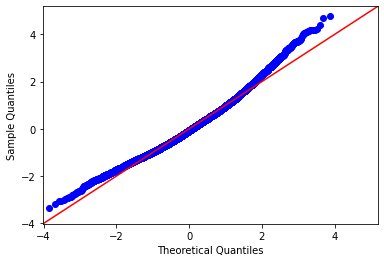

In [62]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Checking for Homoscedasticity 

Checking that errors do not display heteroscedasticity

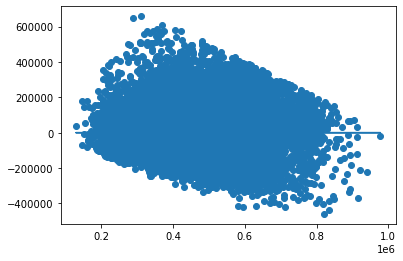

In [63]:
plt.scatter(model.predict(df_final[predictor_cols]), model.resid)
plt.plot(model.predict(df_final[predictor_cols]),
         [0 for i in range(len(df_final))])

## Model Refinement 3 

### Refining

Large errors above 855000, so I removed these outliers, and began retraining the model. 

In [64]:
#Finding a cutoff point
for i in range(90, 99):
    q = i / 100
    print('{} percentile:{}'.format(q, df_final['price'].quantile(q=q)))

0.9 percentile:718250.0
0.91 percentile:732052.5000000005
0.92 percentile:750000.0
0.93 percentile:765000.0
0.94 percentile:782049.9999999993
0.95 percentile:802875.0
0.96 percentile:826239.9999999986
0.97 percentile:854049.9999999993
0.98 percentile:892200.0000000007


In [65]:
subset = df_final[df_final['price'] < 855000]
print('Percent removed:', (len(df_final) - len(subset)) / len(df_final))
outcome = 'price'
predictors = '+'.join(predictor_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=subset).fit()
model.summary()

Percent removed: 0.030001119444755402


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     722.1
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:02:25   Log-Likelihood:            -2.2840e+05
No. Observations:               17330   AIC:                         4.568e+05
Df Residuals:                   17312   BIC:                         4.570e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.957e+05   9744.115     50.874      0.000    4.77e+05    5.15e+05
sqft_living          95.6922      2.464     38.833      0.000      90.862     100.522
cnd_Fair          -3.285e+04   1.03e+04     -3.197      0.001    -5.3e+04   -1.27e+04
cnd_Good           2.514e+04   2356.812     10.669      0.000    2.05e+04    2.98e+04
cnd_Very_Good      7.066e+04   3898.913     18.123      0.000     6.3e+04    7.83e+04
grd_3_Poor        -3.541e+05   1.29e+05     -2.755      0.006   -6.06e+05   -1.02e+05
grd_4_Low          -3.57e+05   2.62e+04    -13.603      0.000   -4.08e+05   -3.06e+05
grd_5_Fair        -3.497e+05    1.2e+04    -29.239      0.000   -3.73e+05   -3.26e+05
grd_6_Low_Average -3.074e+05   8755.444    -35.104      0.000   -3.25e+05    -2.9e+05
grd_7_Average     -2.303e+05   7947.122    -28.983      0.000   -2.46e+05   -2.15e+05
grd_8_Good        -1.518e+05   7657.501    -19.824      0.000   -1.67e+05   -1.37e+05
grd_9_Better      -6.774e+04   7912.073     -8.561      0.000   -8.32e+04   -5.22e+04
fl_1_5             7.739e+04   3597.352     21.513      0.000    7.03e+04    8.44e+04
fl_2_0            -2.275e+04   2568.127     -8.860      0.000   -2.78e+04   -1.77e+04
fl_2_5             5.807e+04   1.58e+04      3.676      0.000    2.71e+04     8.9e+04
fl_3_0             3.309e+04   6152.780      5.378      0.000     2.1e+04    4.52e+04
bed_3             -5.383e+04   3003.365    -17.922      0.000   -5.97e+04   -4.79e+04
bed_4             -6.248e+04   3689.371    -16.936      0.000   -6.97e+04   -5.53e+04
==============================================================================
Omnibus:                      375.912   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.574
Skew:                           0.372   Prob(JB):                     1.04e-87
Kurtosis:                       3.015   Cond. No.                     2.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model 3 has a R-squared of 0.415 making it the most accurate of the models so far. While this model still has high multicollinearity it has been reduced overall. Due to this I have chosen this model to draw final conclusions from. 

### Rechecking Normality 

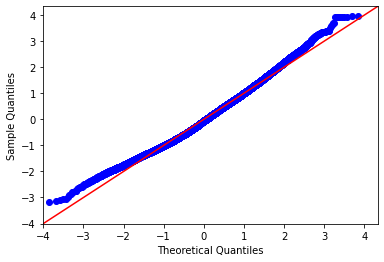

In [66]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Rechecking Homoscedasticity

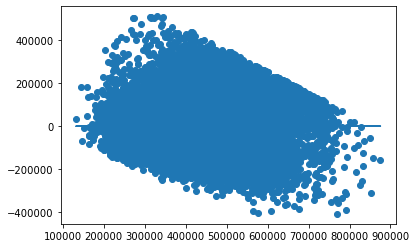

In [67]:
plt.scatter(model.predict(subset[predictor_cols]), model.resid)
plt.plot(model.predict(subset[predictor_cols]),
         [0 for i in range(len(subset))])

## Model Refinement 4

Due to the errors at the beginning, I decided to remove some of the outliers in the initial price. 

In [68]:
#Finding a beginning point
for i in range(45, 50):
    q = i / 100
    print('{} percentile:{}'.format(q, df_final['price'].quantile(q=q)))

0.45 percentile:394950.0
0.46 percentile:399500.0
0.47 percentile:400000.0
0.48 percentile:406500.0
0.49 percentile:412500.0


In [69]:
subset_2 = subset[subset['price'] >= 400000]
print('Percent removed:', (len(subset) - len(subset_2)) / len(subset))
outcome = 'price'
predictors = '+'.join(predictor_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=subset_2).fit()
model.summary()

Percent removed: 0.4769186381996538


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     206.9
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:02:34   Log-Likelihood:            -1.1744e+05
No. Observations:                9065   AIC:                         2.349e+05
Df Residuals:                    9048   BIC:                         2.350e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.893e+05   9057.827     65.058      0.000    5.72e+05    6.07e+05
sqft_living          50.6154      2.542     19.913      0.000      45.633      55.598
cnd_Fair          -5732.2581   1.72e+04     -0.333      0.739   -3.95e+04     2.8e+04
cnd_Good           2.784e+04   2654.068     10.488      0.000    2.26e+04     3.3e+04
cnd_Very_Good      5.274e+04   4123.890     12.788      0.000    4.47e+04    6.08e+04
grd_3_Poor        -1.274e-10   2.39e-11     -5.334      0.000   -1.74e-10   -8.06e-11
grd_4_Low         -1.922e+05   1.03e+05     -1.871      0.061   -3.94e+05    9212.931
grd_5_Fair        -1.247e+05   2.42e+04     -5.161      0.000   -1.72e+05   -7.73e+04
grd_6_Low_Average -1.903e+05   9004.569    -21.134      0.000   -2.08e+05   -1.73e+05
grd_7_Average      -1.61e+05   6790.458    -23.713      0.000   -1.74e+05   -1.48e+05
grd_8_Good        -1.184e+05   6351.493    -18.644      0.000   -1.31e+05   -1.06e+05
grd_9_Better      -5.967e+04   6438.534     -9.268      0.000   -7.23e+04   -4.71e+04
fl_1_5             4.817e+04   3702.043     13.013      0.000    4.09e+04    5.54e+04
fl_2_0            -1.582e+04   2797.515     -5.654      0.000   -2.13e+04   -1.03e+04
fl_2_5              1.61e+04   1.34e+04      1.200      0.230   -1.02e+04    4.24e+04
fl_3_0             -743.8171   6156.772     -0.121      0.904   -1.28e+04    1.13e+04
bed_3             -1.928e+04   3561.286     -5.413      0.000   -2.63e+04   -1.23e+04
bed_4             -1.676e+04   4103.983     -4.085      0.000   -2.48e+04   -8719.175
==============================================================================
Omnibus:                      218.184   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.939
Skew:                           0.393   Prob(JB):                     1.59e-51
Kurtosis:                       3.003   Cond. No.                     1.35e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.29e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Model 4 is still showcasing high levels of multicolinearity as well as a low R-squared value of 0.268.Due to that I chose not to use this model as the final model to draw conclusions from. Instead I will be using model 3 due to its higher R-squared value of 0.415.  

### Last Check Normality

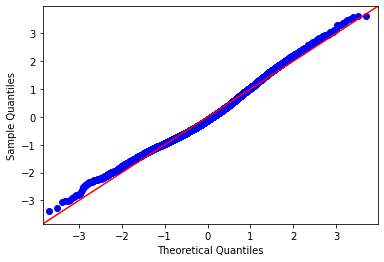

In [70]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Last Check Homoscedasticity

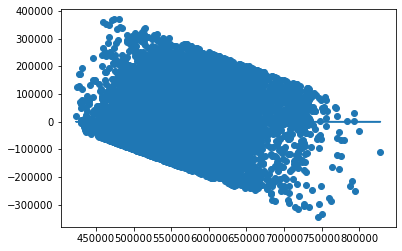

In [71]:
plt.scatter(model.predict(subset_2[predictor_cols]), model.resid)
plt.plot(model.predict(subset_2[predictor_cols]),
         [0 for i in range(len(subset_2))])

## Regression Results 

Model 3 has a R-squared of 0.415 making it the most accurate of the models so far.

***Coefficients***
- The target price per a sqft living is $95. 

- Through out the various levels of a home two story homes degraded the price of a home by 23,000. While 2.5 story homes increase the price by 58,000.Lofts being the ideal by bringing up the price to 77,000.

- The condition of the home influence the price greatly.With the condition of fair bringing down the home value by 32,000 while the condition status of good increases the home value by 25,000. The ideal condition status for homes value is very good increasing the price by 70,000. 

Draw Backs:
This model lacks in depth information about bathrooms and bedrooms with bedrooms 3 and 4 both being being negative. Grading status also seems to be unreliable with even positive grading scale decreasing the price of a home. 

## Conclusion


***Recommendations*** Based on model 3 

- Target price per a sqft at $95

- Focus on building more lofts, townhouses and three stories homes since they are the most profitable. Avoid regular two story homes and instead aim for lofts which is the best increasing the price of home by 77,000. 

- While all houses flipped/made will also need to meet the condition good to ensure the price value increases by 58,000.


## Next Steps 

Based on Model 3: 

Limitations :The model is on the weaker side with a R-squared value of 0.415, preferable we would have a model with a higher R-squared conveying a more accurate model.

Limited Data: Bedrooms is negative in model 3 as well as lacking options in their respective groups to draw conclusions from. Expand the predictor variables to have more aspects of a home to mix and match for future properties. Grading status seems unreliable with even a positive grade conveying a decrease in home value.

Issues with multicollinearity :Even after verifying assumptions for multicollinearity the error still appeared under the models final results, for future use multicollinearity need to be reduced. 
 